# Google Imagen

With Imagen on Langchain , You can do the following tasks

- [VertexAIImageGeneratorChat](#image-generation) : Generate novel images using only a text prompt (text-to-image AI generation).
- [VertexAIImageEditorChat](#image-editing) : Edit an entire uploaded or generated image with a text prompt.
- [VertexAIImageCaptioning](#image-captioning) : Get text descriptions of images with visual captioning.
- [VertexAIVisualQnAChat](#visual-question-answering-vqa) : Get answers to a question about an image with Visual Question Answering (VQA).

## Image Generation
Generate novel images using only a text prompt (text-to-image AI generation)

In [2]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_google_vertexai.vision_models import VertexAIImageGeneratorChat

In [3]:
# Create Image Gentation model Object
generator = VertexAIImageGeneratorChat()

In [7]:
messages = [HumanMessage(content=["a cat at the beach"])]
response = generator.invoke(messages)

In [8]:
# To view the generated Image
generated_image = response.content[0]

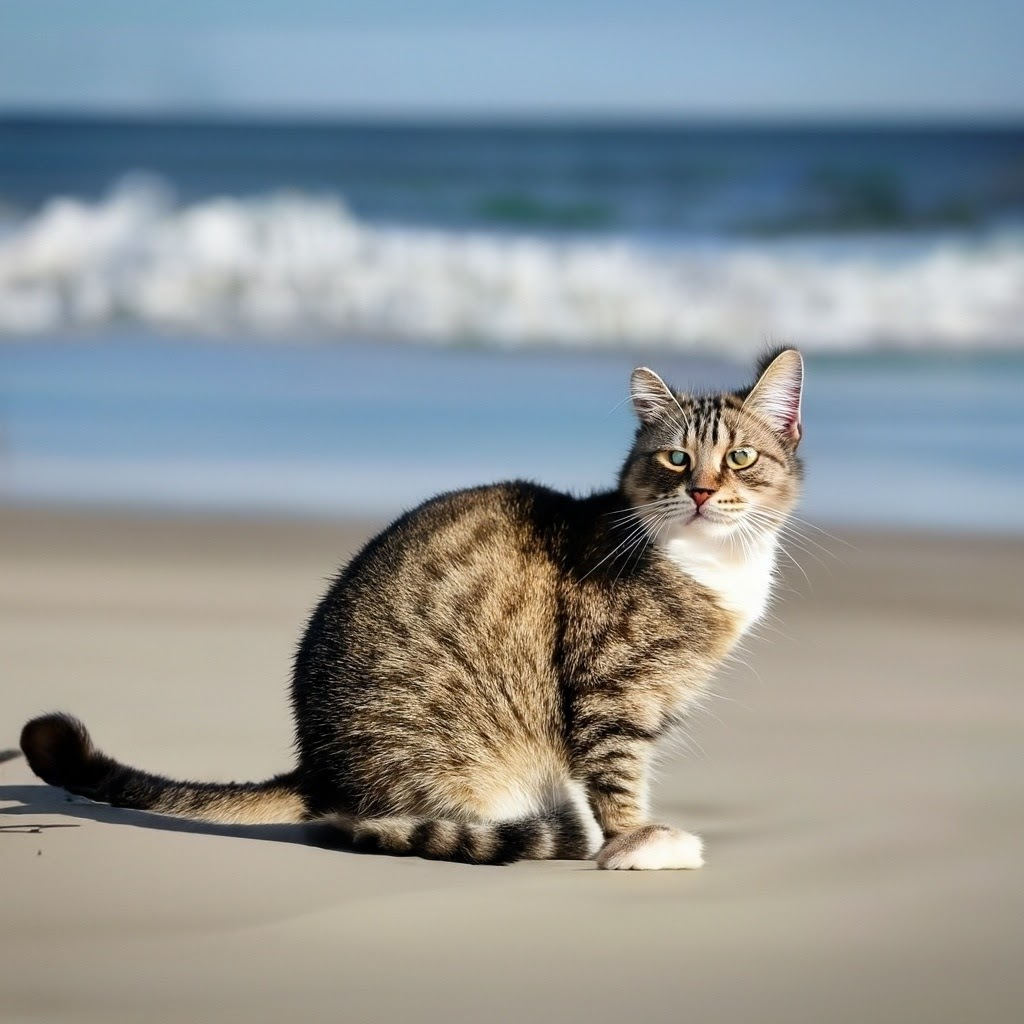

In [9]:
import base64
import io

from PIL import Image

# Parse response object to get base64 string for image
img_base64 = generated_image["image_url"]["url"].split(",")[-1]

# Convert base64 string to Image
img = Image.open(io.BytesIO(base64.decodebytes(bytes(img_base64, "utf-8"))))

# view Image
img

## Image Editing
Edit an entire uploaded or generated image with a text prompt.

### Edit Generated Image

In [10]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_google_vertexai.vision_models import (
    VertexAIImageEditorChat,
    VertexAIImageGeneratorChat,
)

In [11]:
# Create Image Gentation model Object
generator = VertexAIImageGeneratorChat()

# Provide a text input for image
messages = [HumanMessage(content=["a cat at the beach"])]

# call the model to generate an image
response = generator.invoke(messages)

# read the image object from the response
generated_image = response.content[0]

In [12]:
# Create Image Editor model Object
editor = VertexAIImageEditorChat()

In [13]:
# Write prompt for editing and pass the "generated_image"
messages = [HumanMessage(content=[generated_image, "a dog at the beach "])]

# Call the model for editing Image
editor_response = editor.invoke(messages)

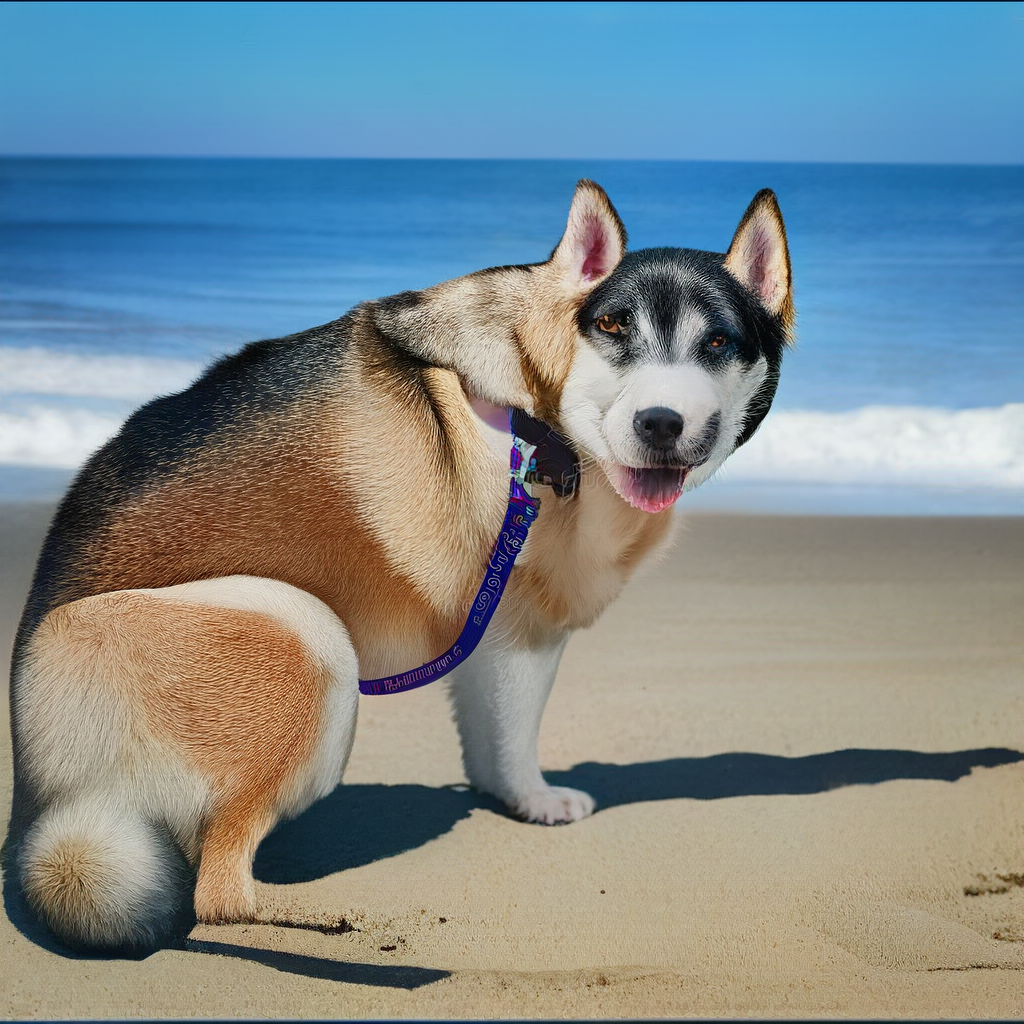

In [14]:
import base64
import io

from PIL import Image

# Parse response object to get base64 string for image
edited_img_base64 = editor_response.content[0]["image_url"]["url"].split(",")[-1]

# Convert base64 string to Image
edited_img = Image.open(
    io.BytesIO(base64.decodebytes(bytes(edited_img_base64, "utf-8")))
)

# view Image
edited_img

## Image Captioning

In [18]:
from langchain_google_vertexai import VertexAIImageCaptioning

# Initialize the Image Captioning Object
model = VertexAIImageCaptioning()

NOTE :  we're using generated image in [Image Generation Section](#image-generation)

Generated Cpation : a cat sitting on the beach looking at the camera


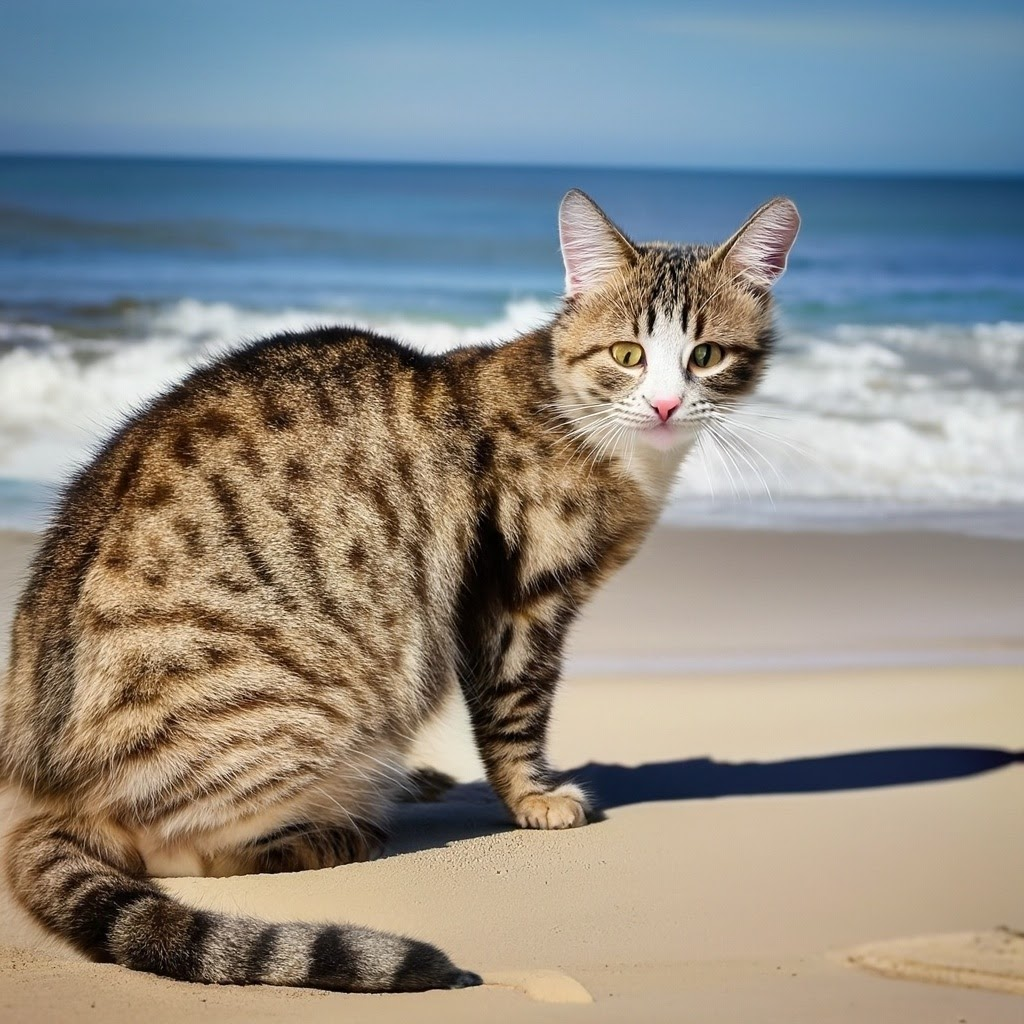

In [19]:
# use image egenarted in Image Generation Section
img_base64 = generated_image["image_url"]["url"]
response = model.invoke(img_base64)
print(f"Generated Cpation : {response}")

# Convert base64 string to Image
img = Image.open(
    io.BytesIO(base64.decodebytes(bytes(img_base64.split(",")[-1], "utf-8")))
)

# display Image
img

## Visual Question Answering (VQA)

In [21]:
from langchain_google_vertexai import VertexAIVisualQnAChat

model = VertexAIVisualQnAChat()

NOTE :  we're using generated image in [Image Generation Section](#image-generation)

question : What animal is shown in the image?
answer : cat


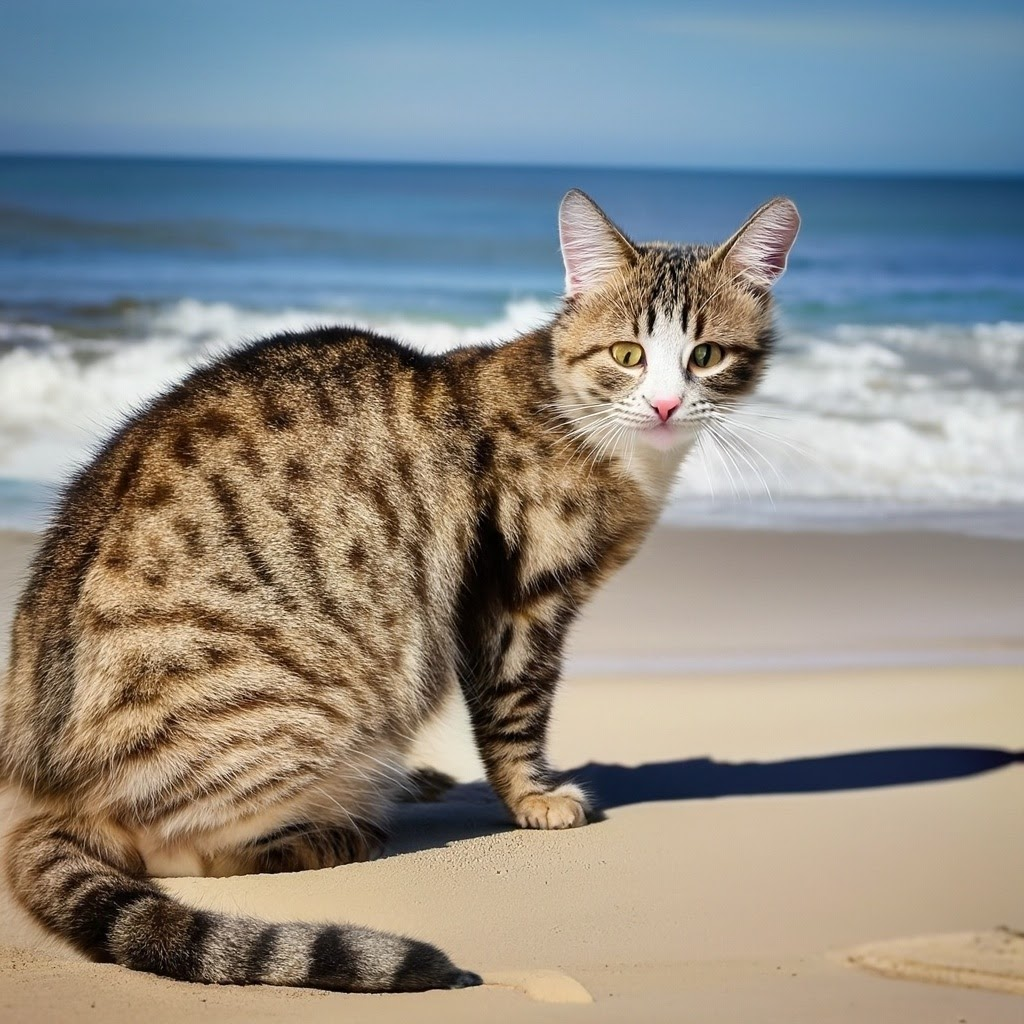

In [23]:
question = "What animal is shown in the image?"
response = model.invoke(
    input=[
        HumanMessage(
            content=[
                {"type": "image_url", "image_url": {"url": img_base64}},
                question,
            ]
        )
    ]
)

print(f"question : {question}\nanswer : {response.content}")

# Convert base64 string to Image
img = Image.open(
    io.BytesIO(base64.decodebytes(bytes(img_base64.split(",")[-1], "utf-8")))
)

# display Image
img